In [1]:
import pandas as pd
from bs4 import BeautifulSoup
import requests

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data scrapping:

In [2]:
Name = []
Price = []
Rating = []
Link = []

base_url = 'https://www.amazon.in'
search_term = 'dresses for women'

for i in range(1,61):

    # URL of the Amazon search results page
    url = f'{base_url}/s?page={i}&keywords={search_term}'
    
    # User-Agent header to mimic a web browser
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/112.0.0.0 Safari/537.36'}
    
    # Send a GET request to the URL
    req = requests.get(url,headers = headers)

    # Create a BeautifulSoup object from the response content
    soup = BeautifulSoup(req.content, 'html.parser')

    # Find all the product containers on the page
    products = soup.find_all('div',class_='a-section a-spacing-base a-text-center')
  
    # Iterate over each product container and extract relevant information
    for product in products:

        # Extract the product Names
        name = product.find('span',class_='a-size-base-plus a-color-base a-text-normal')
        Name.append(name.text)


        # Extract the product Price
        price = product.find('span',class_='a-price-whole')
        Price.append(price.text)

        # Extract the product Rating
        stars = product.find('span', class_='a-icon-alt')
        Rating.append(stars)
        
        link = product.find('a',class_='a-link-normal s-no-outline')
        Link.append(base_url +link['href'])
        

# Store all the extracted data       
Data = {'Name':Name, 'Price':Price, 'Rating':Rating, 'Link':Link}        
        

# Create a DataFrame from the extracted data    
df=pd.DataFrame(Data)
df

,Name,Price,Rating,Link
0,V-Neck Printed Dress Floral Rayon Sleevless Po...,999,None,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
1,Western Dresses for Women | A-Line Knee-Length...,399,[3.9 out of 5 stars],https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
2,Women's Rayon Full Sleeve A-Line Knee-Length W...,399,[3.6 out of 5 stars],https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
3,Women's Shirt Maxi Dress,499,[3.9 out of 5 stars],https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
4,Round Neck Printed Dresses,520,[4.0 out of 5 stars],https://www.amazon.in/Harpa-Womens-A-Line-Dres...
...,...,...,...,...
1023,Women Knee Length Dress,399,[2.7 out of 5 stars],https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
1024,dharti Enterprise Women’s Empire Maxi Dress,499,[5.0 out of 5 stars],https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
1025,Designer Floral Print midi Dress,499,[3.4 out of 5 stars],https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
1026,Designer printed fit and flare dress,599,None,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...


# Data Cleaning:

In [65]:
# 1. Checking for Duplicates:

In [5]:
len(df[df.duplicated()])

0

There are no any Duplicate values in the Dataset.

In [6]:
# 2. Dealing with Null values:

In [7]:
df.isnull().sum()

Name        0
Price       0
Rating    239
Link        0
dtype: int64

In [10]:
df1 = df.dropna()

In [11]:
len(df1)/len(df)

0.7675097276264592

After dropping the Null values, still getting 76% of data. So we can drop the Null values.

In [12]:
df = df.dropna()

In [13]:
df

,Name,Price,Rating,Link
1,Western Dresses for Women | A-Line Knee-Length...,399,[3.9 out of 5 stars],https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
2,Women's Rayon Full Sleeve A-Line Knee-Length W...,399,[3.6 out of 5 stars],https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
3,Women's Shirt Maxi Dress,499,[3.9 out of 5 stars],https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
4,Round Neck Printed Dresses,520,[4.0 out of 5 stars],https://www.amazon.in/Harpa-Womens-A-Line-Dres...
5,Women's Synthetic a-line Knee-Long Dress,708,[4.0 out of 5 stars],https://www.amazon.in/Rare-Synthetic-a-line-Dr...
...,...,...,...,...
1017,Embroidered Sleeveless Denim Dress for Women/G...,"1,499",[5.0 out of 5 stars],https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
1019,Georgette Round Neck Half Sleeves Black Chikan...,"1,049",[3.9 out of 5 stars],https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
1023,Women Knee Length Dress,399,[2.7 out of 5 stars],https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
1024,dharti Enterprise Women’s Empire Maxi Dress,499,[5.0 out of 5 stars],https://www.amazon.in/sspa/click?ie=UTF8&spc=M...


In [14]:
# Checking for the Data types:

In [15]:
df.dtypes

Name      object
Price     object
Rating    object
Link      object
dtype: object

Here we can see the data types of all column are Object, but data types of Price and Rating columns should not be object, it should be "Integer and Float". 

Changing the data types of Price and Rating columns:

In [18]:
df['Price']=df['Price'].str.replace(',','')

C:\Users\dell6\AppData\Local\Temp\ipykernel_2028\2916479803.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price']=df['Price'].str.replace(',','')


In [26]:
Rating = []
for i in df['Rating']:
    i =(i.text).split(' ')[0]
    Rating.append(i)
    
df['Rating']= Rating

C:\Users\dell6\AppData\Local\Temp\ipykernel_2028\3318716433.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rating']= Rating


In [27]:
df.head()

,Name,Price,Rating,Link
1,Western Dresses for Women | A-Line Knee-Length...,399,3.9,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
2,Women's Rayon Full Sleeve A-Line Knee-Length W...,399,3.6,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
3,Women's Shirt Maxi Dress,499,3.9,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
4,Round Neck Printed Dresses,520,4.0,https://www.amazon.in/Harpa-Womens-A-Line-Dres...
5,Women's Synthetic a-line Knee-Long Dress,708,4.0,https://www.amazon.in/Rare-Synthetic-a-line-Dr...


In [31]:
df['Price']=df['Price'].astype(int)
df['Rating']=df['Rating'].astype(float)

C:\Users\dell6\AppData\Local\Temp\ipykernel_2028\3410540024.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price']=df['Price'].astype(int)
C:\Users\dell6\AppData\Local\Temp\ipykernel_2028\3410540024.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rating']=df['Rating'].astype(float)


In [32]:
df.dtypes

Name       object
Price       int32
Rating    float64
Link       object
dtype: object

# Visualization:

1. Maximum rating of Products

C:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating', ylabel='count'>

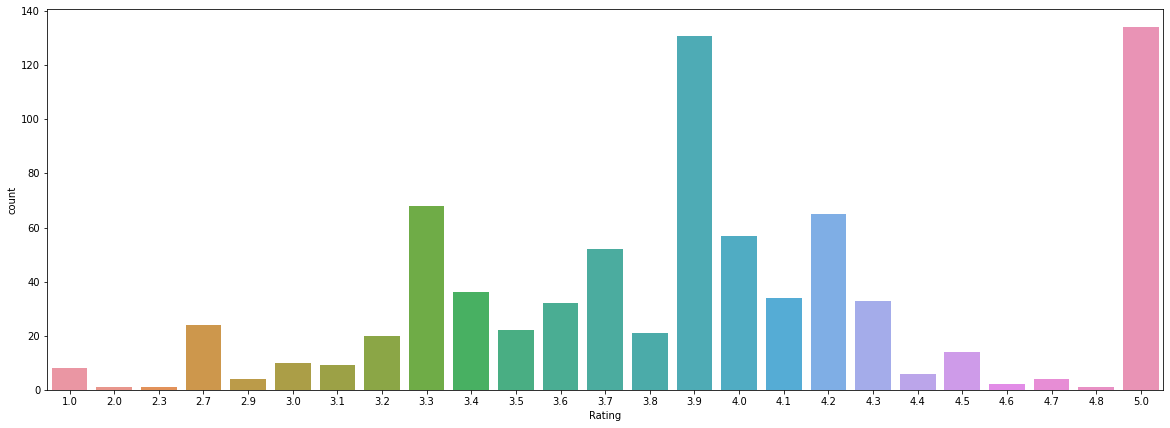

In [66]:
plt.figure(figsize=(20,7))
sns.countplot(df['Rating'])

In [58]:
df['Rating'].value_counts()

5.0    134
3.9    131
3.3     68
4.2     65
4.0     57
3.7     52
3.4     36
4.1     34
4.3     33
3.6     32
2.7     24
3.5     22
3.8     21
3.2     20
4.5     14
3.0     10
3.1      9
1.0      8
4.4      6
2.9      4
4.7      4
4.6      2
4.8      1
2.0      1
2.3      1
Name: Rating, dtype: int64

Most of the products have 5 rating.

2. For each Product Name, the maximum Price

In [67]:
a = df.groupby('Name')['Price'].max().to_frame().reset_index()
a

,Name,Price
0,(3323DnmCrossBtnDrs Women's Denim Dress with V...,684
1,Aika Women's Georgette Embroidered Dress Lara ...,499
2,Boho African Headbands Yoga Wide Knot Hair Ban...,1829
3,"Bra Converting Clips, clear, 2 pcs",1682
4,Casual Bodycon Black Dress for Women,375
...,...,...
252,Women’s Empire Maxi Dress(Lucy-422-425-426-428),259
253,Women’s Empire Maxi Dress(Lucy-542-549),259
254,Women’s High-Low Knee Length Dress(Ruby-026-02...,449
255,d50,508
